In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/iris.data.txt",sep=',')
print(df.head())
print(df.isnull().sum())

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa
5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64


In [10]:


import csv
import math

with open('iris.data.txt', 'r') as csvfile:
  lines = csv.reader(csvfile)

  for row in lines :

    print (', '.join(row))

import csv

import random

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
  with open(filename, 'r') as csvfile:

    lines = csv.reader(csvfile)

    dataset = list(lines)

    for x in range(len(dataset)-1):

      for y in range(4):

        dataset[x][y] = float(dataset[x][y])
        # print(dataset)

      if random.random() < split:
            trainingSet.append(dataset[x])
      else:
            testSet.append(dataset[x])


trainingSet=[]

testSet=[]

loadDataset("/content/iris.data.txt", 0.66, trainingSet, testSet)

print ('Train: ' + repr(len(trainingSet)))

print ('Test: ' + repr(len(testSet)) )

5.1, 3.5, 1.4, 0.2, Iris-setosa
4.9, 3.0, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.3, 0.2, Iris-setosa
4.6, 3.1, 1.5, 0.2, Iris-setosa
5.0, 3.6, 1.4, 0.2, Iris-setosa
5.4, 3.9, 1.7, 0.4, Iris-setosa
4.6, 3.4, 1.4, 0.3, Iris-setosa
5.0, 3.4, 1.5, 0.2, Iris-setosa
4.4, 2.9, 1.4, 0.2, Iris-setosa
4.9, 3.1, 1.5, 0.1, Iris-setosa
5.4, 3.7, 1.5, 0.2, Iris-setosa
4.8, 3.4, 1.6, 0.2, Iris-setosa
4.8, 3.0, 1.4, 0.1, Iris-setosa
4.3, 3.0, 1.1, 0.1, Iris-setosa
5.8, 4.0, 1.2, 0.2, Iris-setosa
5.7, 4.4, 1.5, 0.4, Iris-setosa
5.4, 3.9, 1.3, 0.4, Iris-setosa
5.1, 3.5, 1.4, 0.3, Iris-setosa
5.7, 3.8, 1.7, 0.3, Iris-setosa
5.1, 3.8, 1.5, 0.3, Iris-setosa
5.4, 3.4, 1.7, 0.2, Iris-setosa
5.1, 3.7, 1.5, 0.4, Iris-setosa
4.6, 3.6, 1.0, 0.2, Iris-setosa
5.1, 3.3, 1.7, 0.5, Iris-setosa
4.8, 3.4, 1.9, 0.2, Iris-setosa
5.0, 3.0, 1.6, 0.2, Iris-setosa
5.0, 3.4, 1.6, 0.4, Iris-setosa
5.2, 3.5, 1.5, 0.2, Iris-setosa
5.2, 3.4, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.6, 0.2, Iris-setosa
4.8, 3.1, 1.6, 0.2, Iris-setosa
5.4, 3.4

In [11]:
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)
data1 = [2, 2, 2, 'a']

data2 = [4, 4, 4, 'b']

distance = euclideanDistance(data1, data2, 3)
print('Distance: ' + repr(distance))

Distance: 3.4641016151377544


In [12]:
import operator 
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors


trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]

testInstance = [5, 5, 5]

k = 1

neighbors = getNeighbors(trainSet, testInstance, 1)

print(neighbors)

[[4, 4, 4, 'b']]


In [13]:
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

response = getResponse(neighbors)

print(response)

a


In [20]:
def getAccuracy(testSet, predictions):
  correct = 0
  for x in range(len(testSet)):
    if testSet[x][-1] in predictions[x]: 
      correct = correct + 1
  return (correct/float(len(testSet))*100) 
 
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

predictions = ['a', 'a', 'a']

accuracy = getAccuracy(testSet, predictions)

print(accuracy)

66.66666666666666


In [22]:
trainingSet=[]
testSet=[]
split = 0.67
loadDataset('/content/iris.data.txt', split, trainingSet, testSet)
print ('Train set: ' + repr(len(trainingSet)))
print ('Test set: ' + repr(len(testSet)))
# generate predictions
predictions=[]
k = 3
for x in range(len(testSet)):
  neighbors = getNeighbors(trainingSet, testSet[x], k)
  result = getResponse(neighbors)
  predictions.append(result)
  print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Train set: 96
Test set: 53
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



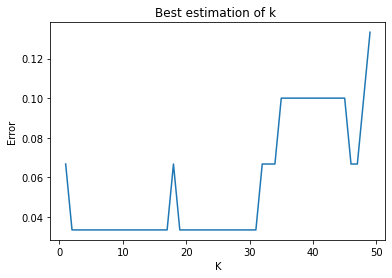

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [26]:
#importing required models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
#read dataframe
df = pd.read_csv("/content/iris.data.txt")
#target and input variable selection
X, y = df.iloc[:,:-1].values, df.iloc[:, -1].values
#do train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Standardizing the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
#creating model with random value of K
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model= knn.fit(X_train_scaled, y_train)
#making prediction
pred = model.predict(X_test_scaled)
#checking accuracy of model
print(classification_report(y_test, pred))

import matplotlib.pyplot as plt
error = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    model= knn.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    error.append(np.mean(pred != y_test))
                         
#plotting graph of error vs value of k                         
plt.plot(range(1, 50), error)
plt.xlabel("K")
plt.ylabel("Error")
plt.title("Best estimation of k ")
plt.show()

knn = KNeighborsClassifier(n_neighbors=25)
model= knn.fit(X_train_scaled, y_train)
#making prediction
pred = model.predict(X_test_scaled)
#checking accuracy of model
print(classification_report(y_test, pred))